# Homework #2

Noam Yan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from scipy import signal

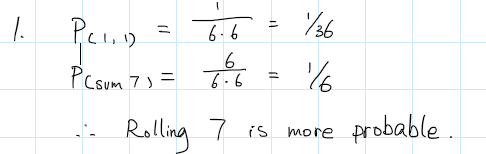

2.

In [2]:
cols = np.linspace(1,6,6,dtype='int8')
rows = cols
value = np.zeros((6,6),dtype='int8')
for i in cols:
    for j in rows:
        value[i-1][j-1] = i+j
        
pd.DataFrame(data=value, columns=cols)

,1,2,3,4,5,6
0,2,3,4,5,6,7
1,3,4,5,6,7,8
2,4,5,6,7,8,9
3,5,6,7,8,9,10
4,6,7,8,9,10,11
5,7,8,9,10,11,12


The table shows the sum of two dices, we can easily get the probability by counting.

In [3]:
sum_val, counts = np.unique(value, return_counts=True)
pd.DataFrame(np.transpose([sum_val,counts/36*100]),columns=['Sum value','Probability %'])

,Sum value,Probability %
0,2.0,2.777778
1,3.0,5.555556
2,4.0,8.333333
3,5.0,11.111111
4,6.0,13.888889
5,7.0,16.666667
6,8.0,13.888889
7,9.0,11.111111
8,10.0,8.333333
9,11.0,5.555556


The table above shows the result of probability by counting. Now, let's generate a discrete uniform distribution with loc=1/6 to emulate rolling dice, and then convolve them.

The probability of convolved events is 
[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


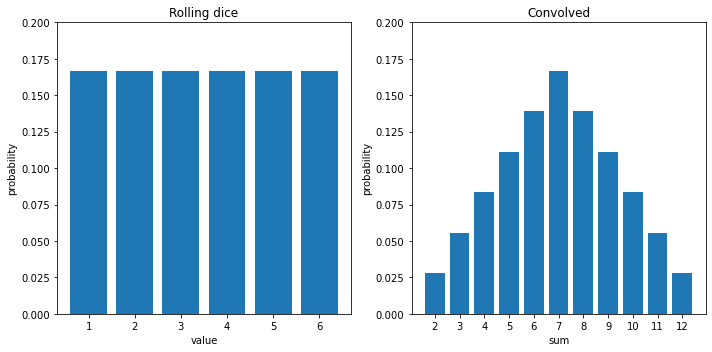

In [2]:
delta = 1e-4
xrange = np.linspace(1,6,6)
pdf = stats.uniform.pdf(xrange,loc=1/6,scale=6)

plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots(1, 2)
ax[0].bar(xrange,pdf)
ax[0].set_ylim([0,.2])
ax[0].set_xticks(xrange)
ax[0].set_title('Rolling dice')
ax[0].set_xlabel('value')
ax[0].set_ylabel('probability')

# Now let's convolve two events.
conv_pmf = np.convolve(pdf,pdf)
print('The probability of convolved events is ')
print(conv_pmf)
ax[1].bar(np.linspace(1*2,6*2,6*2-1),conv_pmf)
ax[1].set_ylim([0,.2])
ax[1].set_xticks(np.linspace(1*2,6*2,6*2-1))
ax[1].set_title('Convolved')
ax[1].set_xlabel('sum')
ax[1].set_ylabel('probability')
plt.tight_layout()

3.

In [5]:
mean = np.sum(np.linspace(1*2,6*2,6*2-1)*conv_pmf)
print("The mean value should be the expectation, E(x) = %s"%mean)
var = np.sum((np.linspace(1*2,6*2,6*2-1)-mean)**2 * conv_pmf)
print("The variance sigma^2 = %s"%var)

The mean value should be the expectation, E(x) = 6.999999999999998
The variance sigma^2 = 5.833333333333333


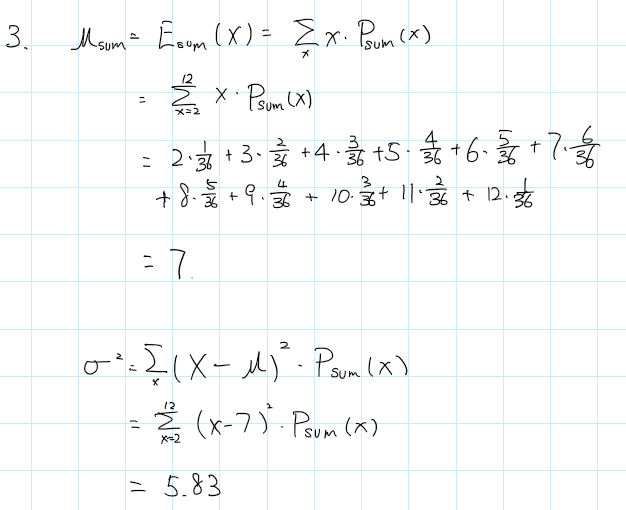

4.

(0.0, 0.08)

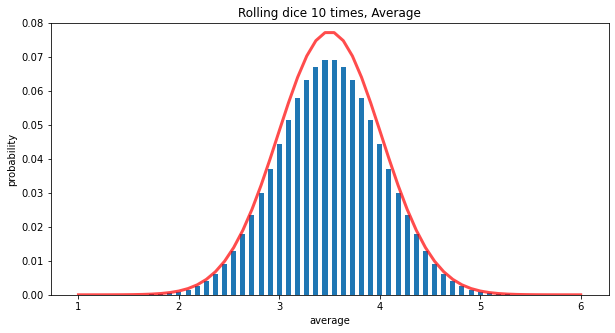

In [14]:
conv_pmf = pdf
for i in range(10):
    conv_pmf = np.convolve(conv_pmf,pdf)
conv_xrange = np.linspace(1,6,conv_pmf.shape[0])
mean = np.sum(conv_xrange*conv_pmf)
conv_var = np.sum((conv_xrange-mean)**2 * conv_pmf)
norm_pdf = stats.norm.pdf(conv_xrange, mean, np.sqrt(conv_var))/10

fig, ax = plt.subplots(1, 1)
ax.bar(conv_xrange,conv_pmf,width=.05)
ax.plot(conv_xrange,norm_pdf,linewidth=3,alpha=.7,color='r')
plt.title('Rolling dice 10 times, Average')
plt.xlabel('average')
plt.ylabel('probability')
plt.ylim([0,0.08])

This plot looks like a Gaussian distribution but it is still not similar enough.According to the Central Limit Theorem, if I average enough of them together, it will approach a Gaussian distribution. <br>
We try to roll the dice 500 times.

Text(0, 0.5, 'probability')

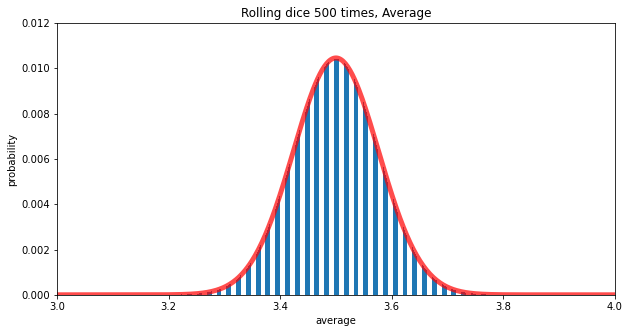

In [15]:
conv_pmf = pdf
for i in range(500):
    conv_pmf = np.convolve(conv_pmf,pdf)
conv_xrange = np.linspace(1,6,conv_pmf.shape[0])
mean = np.sum(conv_xrange*conv_pmf)
conv_var = np.sum((conv_xrange-mean)**2 * conv_pmf)
norm_pdf = stats.norm.pdf(conv_xrange, mean, np.sqrt(conv_var))/500

fig, ax = plt.subplots(1, 1)
ax.bar(conv_xrange,conv_pmf,width=.001)
ax.plot(conv_xrange,norm_pdf,linewidth=5, alpha=0.7,color='r')
plt.xlim([3, 4])
plt.ylim([0,.012])
ax.set_title('Rolling dice 500 times, Average')
ax.set_xlabel('average')
ax.set_ylabel('probability')


This one looks more like Gaussian distribution.

5.

1.1674496142958618e-16
2.842170943040401e-14
-1.8189894035458565e-12


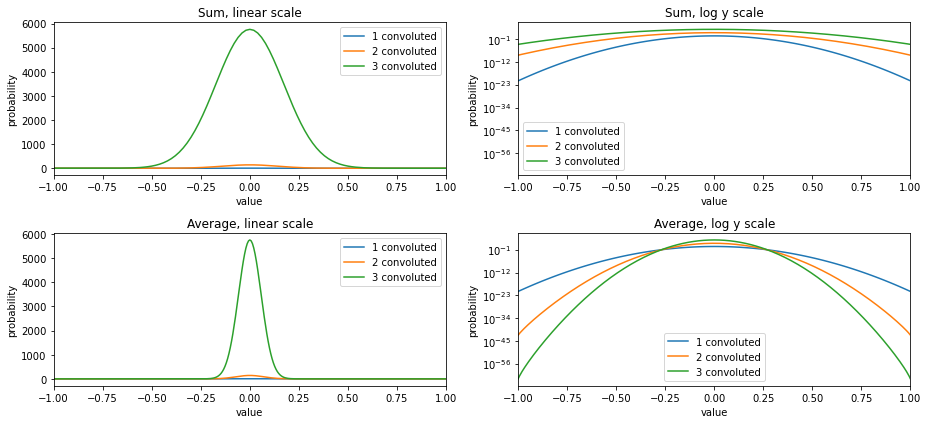

In [61]:
xrange = np.linspace(-1,1,101)
pdf = stats.norm.pdf(xrange,loc=0,scale=.1)
conv_times = [1,2,3]
std_dict = {'sum':[],'avg':[]}

fig, ax = plt.subplots(2, 2)
ax[0,0].set_title('Sum, linear scale')
ax[0,1].set_title('Sum, log y scale')
ax[1,0].set_title('Average, linear scale')
ax[1,1].set_title('Average, log y scale')

for i in conv_times:
    conv_pdf = pdf
    if i!=1:
        for j in range(i-1):
            conv_pdf = np.convolve(conv_pdf,pdf)
            
    sum_x = np.linspace(-1*i,1*i,conv_pdf.shape[0])
    sum_mean = np.sum(sum_x*conv_pdf)
    sum_var = np.sum((sum_x-sum_mean)**2 * conv_pdf)
    std_dict['sum'].append(np.sqrt(sum_var))

    avg_x = np.linspace(-1,1,conv_pdf.shape[0])
    avg_mean = np.sum(avg_x*conv_pdf)
    avg_var = np.sum((avg_x-avg_mean)**2 * conv_pdf) 
    std_dict['avg'].append(np.sqrt(avg_var))

    ax[0,0].plot(sum_x,conv_pdf,label='%s convoluted'%i)
    ax[0,1].semilogy(sum_x,conv_pdf,label='%s convoluted'%i)
    ax[1,0].plot(avg_x,conv_pdf,label='%s convoluted'%i)
    ax[1,1].semilogy(avg_x,conv_pdf,label='%s convoluted'%i)
    
    ax[0,0].legend()
    ax[0,1].legend()
    ax[1,0].legend()
    ax[1,1].legend()
    
plt.setp(ax, xlim=[-1,1],xlabel='value',ylabel='probability')
plt.tight_layout()
    
    

Clearly, both sum and average of an initially Gaussian distribution is also a Guassian.In the log y scale plots, we can see the parabola shape of 2 convoluted(orange) and 3 convoluted(green) distribution, which are similar to the normal distribution (blue).

In [62]:
df = pd.DataFrame(std_dict,index=conv_times)
df.index.name = 'Conv_times'
print("Standard Deviation Table")
print(df)

Standard Deviation Table
                  sum        avg
Conv_times                      
1            0.707107   0.707107
2            7.071068   3.535534
3           61.237244  20.412415


Std grows very fast as convolved more for Sum, but decreases for Average.This makes sense, because the error would accumulated when we sum up measurements and if we average it, the positive and negative errors will cancel out, which makes std smaller.

In [2]:
xrange = np.linspace(-1,1,101)
pdf = stats.norm.pdf(xrange,loc=0,scale=.1)

mean = np.sum(xrange*pdf)
variance = np.sum((xrange-mean)**2 * pdf)
calculated_std = np.sqrt(variance)
std = stats.norm.std(loc=0,scale=.1)

print("calculated std is %s"%calculated_std)
print("setting up std is %s"%std)

calculated std is 0.7071067811865477
setting up std is 0.1
